In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [2]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
len(df)

19433

In [3]:
df = df[df['NewDateTime']>= '2021-01-01'].copy()
len(df)

8171

In [4]:
# df.drop(df.head(len(df)%168).index,inplace=True)
# len(df)

In [5]:
int(len(df)/8*7)

7149

In [6]:
data_training = df.iloc[0:int(len(df)/8*7),:]
data_test = df.iloc[int(len(df)/8*7):int(len(df)),:]

len(data_training)

7149

In [7]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
11262,28995.13,28923.63,29031.34,28690.17,2311.811445,1.002472,0.002469,1.041846,0.0367,38
11263,29409.99,28995.13,29470.00,28960.35,5403.068471,1.014308,0.014207,1.041846,0.0367,36
11264,29194.65,29410.00,29465.26,29120.03,2384.231560,0.992678,-0.007349,1.041846,0.0367,34
11265,29278.40,29195.25,29367.00,29150.02,1461.345077,1.002869,0.002865,1.041846,0.0367,33
11266,29220.31,29278.41,29395.00,29029.40,2038.046803,0.998016,-0.001986,1.041846,0.0367,32
...,...,...,...,...,...,...,...,...,...,...
18406,62401.38,62459.33,62645.97,62329.39,901.270010,0.999072,-0.000928,1.004381,0.0178,66
18407,62369.78,62401.37,62594.84,62212.00,1358.911700,0.999494,-0.000507,1.004381,0.0178,66
18408,62432.54,62369.77,62523.17,62184.01,1080.640700,1.001006,0.001006,1.004381,0.0178,66
18409,62820.30,62432.54,63110.00,62423.71,1790.709680,1.006211,0.006192,1.004381,0.0409,66


In [8]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.        , 0.        , 0.        , ..., 0.85604275, 0.37330183,
        0.27058824],
       [0.01095175, 0.00188395, 0.01155321, ..., 0.85604275, 0.37330183,
        0.24705882],
       [0.00526706, 0.01281533, 0.01142837, ..., 0.85604275, 0.37330183,
        0.22352941],
       ...,
       [0.88270307, 0.88126989, 0.88209144, ..., 0.47298329, 0.31748376,
        0.6       ],
       [0.89293941, 0.88292381, 0.89754708, ..., 0.47298329, 0.38570585,
        0.6       ],
       [0.88886663, 0.89314114, 0.89086526, ..., 0.47298329, 0.38570585,
        0.6       ]])

In [9]:
X_train = []
Y_train = []

In [10]:
training_data.shape

(7149, 10)

In [11]:
for i in range(168, training_data.shape[0]):
    X_train.append(training_data[i-168:i])
    Y_train.append(training_data[i])

In [12]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [13]:
X_train.shape

(6981, 168, 10)

In [14]:
Y_train.shape

(6981, 10)

In [26]:
Y_train[1,0]

0.255703828070759

In [28]:
X_train[2,167,0]

0.255703828070759

In [16]:
# Y_train=Y_train.reshape(Y_train.shape[0],24,1)

In [17]:
# Y_train[1,:,0]

In [18]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [61]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(units =10))

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 168, 50)           12200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 168, 50)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 168, 60)           26640     
_________________________________________________________________
dropout_10 (Dropout)         (None, 168, 60)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 80)                45120     
_________________________________________________________________
dropout_11 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [63]:
model.compile(loss='mse', optimizer='adam')

In [64]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, verbose=1, validation_split=0.1)

Train on 6282 samples, validate on 699 samples
Epoch 1/10
1400/6282 [=====>........................] - ETA: 55s - loss: 606595564477410.5000

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
model = tf.keras.models.load_model('168_1.h5')

In [33]:
model.save("168_1.h5")

In [34]:
# result = model.predict(X_train, batch_size=128, verbose=0)
# for value in result[0,:,0]:
# 	print('%.1f' % value)

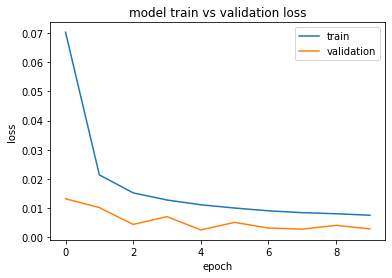

In [35]:
loss = history.history['loss']
epoch = range(len(loss))
# plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [36]:
history.history

{'loss': [0.07033385580778596,
  0.02132648048434372,
  0.01515750326921903,
  0.012708303335056643,
  0.011067778702003395,
  0.009951244875734132,
  0.008994974244287518,
  0.008360996660626702,
  0.007991789805470701,
  0.007479512280067302],
 'val_loss': [0.013143018750108789,
  0.010094926543320623,
  0.00432287521649669,
  0.0069972324912544225,
  0.0024345434815069935,
  0.005020796267371705,
  0.003075458325887997,
  0.002703151212291038,
  0.003993895755566454,
  0.0027928445384956266]}

In [32]:
# from tensorflow import keras
# regressor = Sequential()
# regressor = keras.models.load_model("LSTM_model_1210.h5")

In [37]:
past_weeks = data_training.tail(168)
df= past_weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
df

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,62249.85,62139.09,62400.00,62043.80,1099.517370,2021-10-19 10:00:00,1.001782,0.001781,1.004461,0.0100,78
1,62128.39,62249.86,62337.41,62065.30,967.234490,2021-10-19 11:00:00,0.998049,-0.001953,1.004461,0.0100,78
2,62223.65,62128.39,62515.00,62000.00,1751.806970,2021-10-19 12:00:00,1.001533,0.001532,1.004461,0.0100,78
3,62604.41,62223.65,63278.61,62070.00,6361.610176,2021-10-19 13:00:00,1.006119,0.006101,1.004461,0.0100,78
4,62531.22,62604.41,62686.21,61322.22,5253.448500,2021-10-19 14:00:00,0.998831,-0.001170,1.004461,0.0100,78
...,...,...,...,...,...,...,...,...,...,...,...
1185,50884.48,50921.61,51204.77,50666.00,1312.933600,2021-12-07 19:00:00,0.999271,-0.000729,1.004981,0.0039,23
1186,50441.59,50884.49,51006.20,50150.00,2194.520910,2021-12-07 20:00:00,0.991296,-0.008742,1.004981,0.0039,23
1187,50489.92,50441.59,50856.46,50358.99,1468.150880,2021-12-07 21:00:00,1.000958,0.000958,1.004981,0.0039,23
1188,50245.25,50489.93,50626.43,50039.74,1362.131770,2021-12-07 22:00:00,0.995154,-0.004858,1.004981,0.0039,23


In [38]:
past_weeks

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
18243,62249.85,62139.09,62400.00,62043.80,1099.517370,2021-10-19 10:00:00,1.001782,0.001781,1.004461,0.0100,78
18244,62128.39,62249.86,62337.41,62065.30,967.234490,2021-10-19 11:00:00,0.998049,-0.001953,1.004461,0.0100,78
18245,62223.65,62128.39,62515.00,62000.00,1751.806970,2021-10-19 12:00:00,1.001533,0.001532,1.004461,0.0100,78
18246,62604.41,62223.65,63278.61,62070.00,6361.610176,2021-10-19 13:00:00,1.006119,0.006101,1.004461,0.0100,78
18247,62531.22,62604.41,62686.21,61322.22,5253.448500,2021-10-19 14:00:00,0.998831,-0.001170,1.004461,0.0100,78
...,...,...,...,...,...,...,...,...,...,...,...
18406,62401.38,62459.33,62645.97,62329.39,901.270010,2021-10-26 05:00:00,0.999072,-0.000928,1.004381,0.0178,66
18407,62369.78,62401.37,62594.84,62212.00,1358.911700,2021-10-26 06:00:00,0.999494,-0.000507,1.004381,0.0178,66
18408,62432.54,62369.77,62523.17,62184.01,1080.640700,2021-10-26 07:00:00,1.001006,0.001006,1.004381,0.0178,66
18409,62820.30,62432.54,63110.00,62423.71,1790.709680,2021-10-26 08:00:00,1.006211,0.006192,1.004381,0.0409,66


In [39]:
df = df.drop(['NewDateTime'], axis = 1)
len(df)

1190

In [40]:
inputs = scaler.transform(df)
inputs

array([[0.87788029, 0.87519172, 0.87884745, ..., 0.4737931 , 0.29444773,
        0.74117647],
       [0.87467391, 0.87811039, 0.87719898, ..., 0.4737931 , 0.29444773,
        0.74117647],
       [0.87718865, 0.87490979, 0.88187626, ..., 0.4737931 , 0.29444773,
        0.74117647],
       ...,
       [0.56743381, 0.56697515, 0.57481934, ..., 0.47911513, 0.27643237,
        0.09411765],
       [0.56097485, 0.56824886, 0.56876092, ..., 0.47911513, 0.27643237,
        0.09411765],
       [0.57004807, 0.5618018 , 0.57098802, ..., 0.47911513, 0.27643237,
        0.08235294]])

In [41]:
X_test = []
Y_test = []
for i in range(168, inputs.shape[0]):
    X_test.append(inputs[i-168:i])
    Y_test.append(inputs[i])

In [42]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((1022, 168, 10), (1022, 10))

In [ ]:
scaler.scale_

In [53]:
scale = 1/2.63986674e-05
scale

37880.69999321253

In [55]:
pred = []
real = []
for i in range(0,168):
    pred.append(((model.predict(X_test[i,:,:].reshape(1,168,10)))[0,0])*scale)
    real.append((Y_test[i,0])*scale)
pred , real

([31431.495068497206,
  31412.51544970092,
  31396.38751524198,
  31381.029512975463,
  31363.632658011702,
  31338.157159691633,
  31305.88548571408,
  31267.391133958445,
  31228.212648905726,
  31190.872066505897,
  31155.446154191628,
  31120.629865607436,
  31074.1042856745,
  30999.49537257618,
  30901.725273466407,
  30790.466684862342,
  30674.222728865676,
  30555.680265620067,
  30440.38912893485,
  30331.587098176413,
  30234.778849840757,
  30149.16961521311,
  30067.312953323923,
  29958.49285964015,
  29827.943066777763,
  29680.353161726987,
  29523.60535353111,
  29362.16344261367,
  29204.74053258338,
  29056.412305459515,
  28919.405016789682,
  28792.521997770404,
  28677.66888702457,
  28574.798269373183,
  28478.644802080937,
  28391.67407445613,
  28315.766888599323,
  28249.428537439,
  28190.27697269654,
  28134.04934399277,
  28080.3143989853,
  28033.28305714297,
  27995.052875670364,
  27965.754810776172,
  27944.6844083723,
  27929.082556613754,
  27919.7078

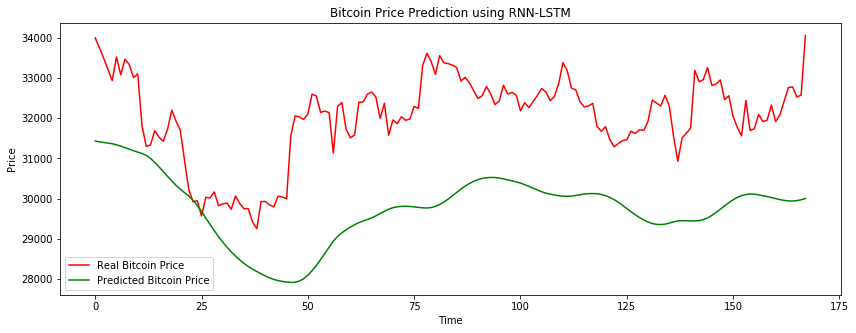

In [56]:
plt.figure(figsize=(14,5))
plt.plot(real, color = 'red', label = 'Real Bitcoin Price')
plt.plot(pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()